# Now Building CKD model after spliting the data into training and testing part 
### (We can split the data into training, testing and validation part but the observation points is too small)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### Load all the relavent libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#! pip install imblearn

     |████████████████████████████████| 163 kB 7.8 MB/s eta 0:00:01


### Load the Consolidated CKD Dataset for further processing

In [9]:
#CKD = pd.read_csv("/content/consolidate_ckd.csv")
CKD = pd.read_csv("consolidate_ckd.csv")

In [7]:
CKD.head()

,id,race,gender,age,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test,HGB_no_of_test,HGB_mean_value,HGB_duration_of_test,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test,atenolol,atorvastatin,bisoprolol,canagliflozin,carvedilol,dapagliflozin,irbesartan,labetalol,losartan,lovastatin,metformin,metoprolol,nebivolol,olmesartan,pitavastatin,pravastatin,propranolol,rosuvastatin,simvastatin,telmisartan,valsartan,total_no_of_days_with_drug,total_no_of_days_without_drug,Stage_Progress
0,0,Unknown,Male,70,6,1.236667,2043,6,6.456667,2043,9,13.262222,5405,3,143.593333,489,8,139.610000,3169,8,83.173750,3169,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,450.0,NaN,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1290.0,328.0,True
1,1,White,Female,71,5,1.838000,1214,5,9.240000,1602,7,13.662857,4777,5,82.424000,1602,7,150.232857,2454,7,80.455714,2454,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,221.0,False
2,2,White,Female,57,5,2.170000,1737,3,6.466667,804,8,15.700000,4500,3,75.283333,681,4,140.210000,1242,4,89.217500,1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,180.0,487.0,True
3,3,White,Male,74,5,0.996000,1800,6,6.525000,2475,10,13.198000,7395,5,98.246000,1670,7,139.588571,2963,7,74.857143,2963,NaN,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,301.0,False
4,4,White,Female,50,6,1.150000,2120,7,9.720000,1974,5,12.658000,2990,4,65.907500,1016,7,160.667143,2445,7,97.385714,2445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,540.0,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN,NaN,1620.0,481.0,True


In [8]:
CKD.Stage_Progress.value_counts()

False    200
True     100
Name: Stage_Progress, dtype: int64

### Here, We can see CKD Stage progress rate for success = 33.3 %
###                     Stage progress rate for failure = 66.7 %
<br>
<br>

In [10]:
CKD = CKD[[col for col in CKD.columns if col!='id']] ## removing id columns as it is unique val to identify
CKD.shape


(300, 45)

### Create Dummies for Categorical Columns : Race and Gender

In [11]:
CKD_dummies = pd.get_dummies(data=CKD, columns=['race','gender'],drop_first=True)
CKD_dummies.shape

(300, 48)

In [12]:
CKD_dummies.head()

,age,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test,HGB_no_of_test,HGB_mean_value,HGB_duration_of_test,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test,atenolol,atorvastatin,bisoprolol,canagliflozin,carvedilol,dapagliflozin,irbesartan,labetalol,losartan,lovastatin,metformin,metoprolol,nebivolol,olmesartan,pitavastatin,pravastatin,propranolol,rosuvastatin,simvastatin,telmisartan,valsartan,total_no_of_days_with_drug,total_no_of_days_without_drug,Stage_Progress,race_Black,race_Hispanic,race_Unknown,race_White,gender_Male
0,70,6,1.236667,2043,6,6.456667,2043,9,13.262222,5405,3,143.593333,489,8,139.610000,3169,8,83.173750,3169,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,450.0,NaN,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1290.0,328.0,True,0,0,1,0,1
1,71,5,1.838000,1214,5,9.240000,1602,7,13.662857,4777,5,82.424000,1602,7,150.232857,2454,7,80.455714,2454,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,221.0,False,0,0,0,1,0
2,57,5,2.170000,1737,3,6.466667,804,8,15.700000,4500,3,75.283333,681,4,140.210000,1242,4,89.217500,1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,180.0,487.0,True,0,0,0,1,0
3,74,5,0.996000,1800,6,6.525000,2475,10,13.198000,7395,5,98.246000,1670,7,139.588571,2963,7,74.857143,2963,NaN,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,301.0,False,0,0,0,1,1
4,50,6,1.150000,2120,7,9.720000,1974,5,12.658000,2990,4,65.907500,1016,7,160.667143,2445,7,97.385714,2445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,540.0,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN,NaN,1620.0,481.0,True,0,0,0,1,0



### Now check, is there any columns with NA/ nul values

In [13]:
CKD_dummies.isnull().sum()

age                                0
creatinine_no_of_test              0
creatinine_mean_value              0
creatinine_duration_of_test        0
glucose_no_of_test                 0
glucose_mean_value                 0
glucose_duration_of_test           0
HGB_no_of_test                     0
HGB_mean_value                     0
HGB_duration_of_test               0
ldl_no_of_test                     0
ldl_mean_value                     0
ldl_duration_of_test               0
SBP_no_of_test                     0
SBP_mean_value                     0
SBP_duration_of_test               0
DBP_no_of_test                     0
DBP_mean_value                     0
DBP_duration_of_test               0
atenolol                         274
atorvastatin                     191
bisoprolol                       295
canagliflozin                    296
carvedilol                       283
dapagliflozin                    298
irbesartan                       294
labetalol                        299
l


### Replace the NA's with zero for further processing

In [0]:
CKD_dummies.fillna(0,inplace=True)


### Check once again to verify

In [15]:
CKD_dummies.isnull().sum()

age                              0
creatinine_no_of_test            0
creatinine_mean_value            0
creatinine_duration_of_test      0
glucose_no_of_test               0
glucose_mean_value               0
glucose_duration_of_test         0
HGB_no_of_test                   0
HGB_mean_value                   0
HGB_duration_of_test             0
ldl_no_of_test                   0
ldl_mean_value                   0
ldl_duration_of_test             0
SBP_no_of_test                   0
SBP_mean_value                   0
SBP_duration_of_test             0
DBP_no_of_test                   0
DBP_mean_value                   0
DBP_duration_of_test             0
atenolol                         0
atorvastatin                     0
bisoprolol                       0
canagliflozin                    0
carvedilol                       0
dapagliflozin                    0
irbesartan                       0
labetalol                        0
losartan                         0
lovastatin          






### Prepare Independent variables and target variable
######  1. Split the dataset into train and test 
######     Traing set = 90%
######     Test Set = 10%     (As we have very limited observation points)

In [16]:
x = CKD_dummies[[col for col in CKD_dummies.columns if col!='Stage_Progress']]
y = CKD_dummies['Stage_Progress']
print(x.shape)
print(y.shape)

(300, 47)
(300,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 47)
(30, 47)
(270,)
(30,)


## Build the Model using Random Forest and also fit the model on the training dataset

In [18]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Now Have a look at the important features from the model (most significent one)

In [19]:
print(model.feature_importances_)

[4.44986586e-02 1.69488730e-02 8.27827611e-02 4.17649324e-02
 1.91199053e-02 4.97511883e-02 3.86252250e-02 2.74531019e-02
 6.30518960e-02 4.60943757e-02 1.62730891e-02 4.64243383e-02
 3.80685153e-02 2.08586026e-02 4.87583514e-02 4.07226089e-02
 1.51867053e-02 5.47571406e-02 3.69614403e-02 6.18331402e-03
 1.76447391e-02 9.28187892e-04 8.35520983e-04 6.57219698e-03
 3.61809436e-04 4.35872412e-03 4.24665019e-04 1.49205624e-02
 4.45154647e-03 1.97206154e-02 2.24462551e-02 2.46626478e-03
 8.84268551e-04 3.47099915e-04 1.40707424e-02 4.84620961e-05
 7.11630874e-03 1.12725740e-02 4.08699995e-03 6.57014143e-03
 3.80506692e-02 3.94826844e-02 2.68123193e-03 3.09421774e-03
 2.70521175e-03 4.16794935e-03 1.60053279e-02]


### Now predict the testing data for accuracy and all

In [0]:
y_pred = model.predict(x_test)

### Calculate the ROC score and plot its curve

In [21]:
rf_probs = model.predict_proba(x_test)[::,1]
from sklearn.metrics import roc_auc_score
d = pd.DataFrame(y_pred, rf_probs)

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8850931677018634

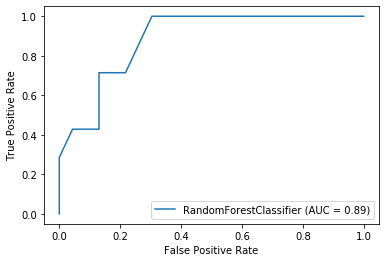

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(model, x_test, y_test)
plt.show()

### Calculate Recall, Precision and Accuracy along with plot the heat map

In [23]:
print('recall:-',metrics.recall_score(y_test,y_pred)*100)
print('precision:-',metrics.precision_score(y_test,y_pred)*100)
print('Accuracy:-',metrics.accuracy_score(y_test,y_pred)*100)
metrics.confusion_matrix(y_test,y_pred)

recall:- 28.57142857142857
precision:- 100.0
Accuracy:- 83.33333333333334


array([[23,  0],
       [ 5,  2]])

Text(0.5, 257.44, 'Predicted label')

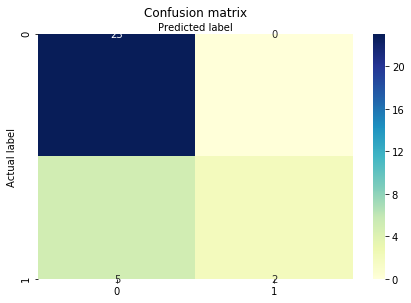

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',  cmap="YlGnBu")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



### Have a look at the training data's shape for smoting then do the over sampling on training data

In [24]:
x_train.shape, y_train.shape

((270, 47), (270,))

In [25]:
##lets use SMOTE and Oversample minority classes
sm = SMOTE(random_state=123,ratio=1.0)
x_train, y_train = sm.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(x_train.shape,y_train.shape)

(354, 47) (354,)


### Build the Random Forest Model on Oversampling data to improve the model Accuracy

In [27]:
## lets apply random forest again and check the recall and precision
model_oversampling = RandomForestClassifier()
model_oversampling.fit(x_train,y_train)
y_pred_oversampling = model_oversampling.predict(x_test)
print('recall:-',metrics.recall_score(y_test,y_pred_oversampling)*100)
print('precision:-',metrics.precision_score(y_test,y_pred_oversampling)*100)
print('Accuracy:-',metrics.accuracy_score(y_test,y_pred_oversampling)*100)
metrics.confusion_matrix(y_test,y_pred_oversampling)

recall:- 28.57142857142857
precision:- 33.33333333333333
Accuracy:- 70.0


array([[19,  4],
       [ 5,  2]])

### Haven't improve the Recall and even Accuracy went down (Might be the less observations point in our dataset)




### Plot the ROC curve and see ROC score

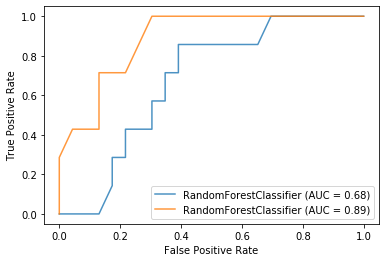

In [28]:
ax = plt.gca()
rf_os_disp = plot_roc_curve(model_oversampling, x_test, y_test, ax=ax, alpha=0.8)
rf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [29]:
rf_probs = model_oversampling.predict_proba(x_test)[::,1]
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6770186335403726




### Lets try with undersampling the data and build the model to the its improving or not?
### And see its Accuracy, recall and all along with heatmap of confusion matrix

In [30]:
## lets try undersampling 
from imblearn.under_sampling import RandomUnderSampler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=123)
underSample = RandomUnderSampler(sampling_strategy="majority")
x_train_undersampling, y_train_undersampling = underSample.fit_resample(x_train,y_train)
print(x_train_undersampling.shape, y_train_undersampling.shape)
model_undersampling = RandomForestClassifier()
model_undersampling.fit(x_train_undersampling,y_train_undersampling)
y_pred_undersampling = model_undersampling.predict(x_test)
print('recall:-',metrics.recall_score(y_test,y_pred_undersampling)*100)
print('precision:-',metrics.precision_score(y_test,y_pred_undersampling)*100)
print('Accuracy:-',metrics.accuracy_score(y_test,y_pred_undersampling)*100)
metrics.confusion_matrix(y_test,y_pred_undersampling)

(186, 47) (186,)
recall:- 85.71428571428571
precision:- 46.15384615384615
Accuracy:- 73.33333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[16,  7],
       [ 1,  6]])

Text(0.5, 257.44, 'Predicted label')

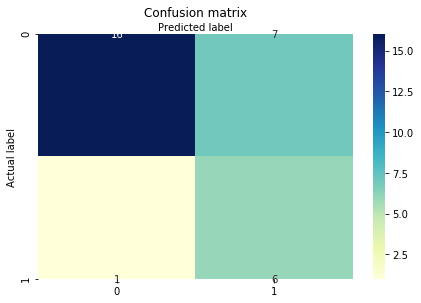

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',  cmap="YlGnBu")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Plot its ROC Curve and calculate the roc curve 

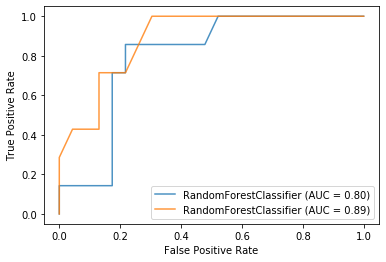

In [31]:
ax = plt.gca()
rf_os_disp = plot_roc_curve(model_undersampling, x_test, y_test, ax=ax, alpha=0.8)
rf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [32]:
# Calculate roc auc
yproba = model_undersampling.predict_proba(x_test)[::,1]
roc_value = roc_auc_score(y_test, yproba)
roc_value

0.7981366459627329

### as we see above our recall has improved... so if we are a little satisfied with increase in recall, because we woule like to report if a person has progressed with more accuuracy.. that means we need more recalll score..TP/(TP_FN)

## lets use Grid search to optimize or tune RandomForest classifier parameteres.

In [34]:
from sklearn.model_selection import GridSearchCV,train_test_split
param_grid = {
    "n_estimators" : list(range(100,1000,100)),
    "min_samples_leaf" : list(range(1,10))
}
model_grid = RandomForestClassifier(random_state=123)
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid)
grid.fit(x_train_undersampling,y_train_undersampling)
print(grid.best_score_)
print(grid.best_params_)

0.6018492176386914
{'min_samples_leaf': 7, 'n_estimators': 200}


## grid search has reduce the recall , its not much effective

In [35]:
grid_model_with_best_params = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],min_samples_leaf=grid.best_params_['min_samples_leaf']) 
grid_model_with_best_params.fit(x_train_undersampling,y_train_undersampling)
y_pred_with_best_params = grid_model_with_best_params.predict(x_test)
print('recall:-',metrics.recall_score(y_test,y_pred_with_best_params)*100)
print('precision:-',metrics.precision_score(y_test,y_pred_with_best_params)*100)
print('Accuracy:-',metrics.accuracy_score(y_test,y_pred_with_best_params)*100)
metrics.confusion_matrix(y_test,y_pred_with_best_params)

recall:- 57.14285714285714
precision:- 44.44444444444444
Accuracy:- 73.33333333333333


array([[18,  5],
       [ 3,  4]])